In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from collections import Counter
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Specify the correct path to your Excel file
file_path = r"C:\Users\HP 2022\Downloads\Sterling E-Commerce Data (1).xlsx"
df = pd.read_excel(file_path)
df.head(3)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9


In [3]:
#checking for the column, non-null and data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [4]:
# checking the null value for the dataset
df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [5]:
#dropping of null value as Order Id as 5 missing value
df.dropna(axis=1, inplace=True)

In [6]:
#checking the total sum of the missing value
df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [7]:
#checking for the column, non-null and data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Payment Method  283083 non-null  object        
 10  Place Name      283083 non-null  object        
 11  Ref Num         283083 non-null  int64         
 12  Region          283083 non-null  object        
 13  State           283083 non-null  object        
 14  User Name       283083 non-null  obj

## Recency, Frequency and Monetary(RFM) Values
Recency: days since last customer transaction.

Frequency: number of transactions in the last 12 months.

Monetary value: total money spend in the last 12 months.

## Recency

In [8]:
recency = df.groupby("Cust Id", as_index=False)["Date of Order"].max()
recency.head()

,Cust Id,Date of Order
0,4,2022-09-29
1,15,2022-02-11
2,16,2021-11-12
3,20,2022-09-29
4,21,2022-02-03


In [9]:
recent_date = df["Date of Order"].dt.date.max()
print('The last recent date in the available dataset is: ', recent_date)

The last recent date in the available dataset is:  2022-09-30


In [10]:
recency['Recency'] = recency["Date of Order"].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()

,Cust Id,Date of Order,Recency
0,4,2022-09-29,1
1,15,2022-02-11,231
2,16,2021-11-12,322
3,20,2022-09-29,1
4,21,2022-02-03,239


###### Observations:

    The last purchase date of every individual customer is taken using the group by function.
    Recency is calculated by subtracting the last recent date available in the dataset with every customer's last purchase date.

##  Frequency

In [11]:
frequency = df.groupby(["Cust Id"]).agg({"Qty Ordered":"nunique"}).reset_index()
frequency.rename(columns={'Qty Ordered':'Frequency'},inplace=True)
frequency.head()

,Cust Id,Frequency
0,4,3
1,15,2
2,16,2
3,20,1
4,21,1


###### Observation:

    Frequency is calculated by selecting the number of unique Qty Ordered or orders placed by each individual customer.

##  Monetary

In [12]:
monetary = df.groupby("Cust Id", as_index=False)["Total"].sum()
monetary.rename(columns={"Total":'Monetary'},inplace=True)
monetary.head()

,Cust Id,Monetary
0,4,27394.190
1,15,216.800
2,16,11868.899
3,20,28719.018
4,21,105.000


In [13]:
rfm = recency.merge(frequency, on="Cust Id")
rfm = rfm.merge(monetary, on="Cust Id").drop(columns="Date of Order")
rfm.head()

,Cust Id,Recency,Frequency,Monetary
0,4,1,3,27394.190
1,15,231,2,216.800
2,16,322,2,11868.899
3,20,1,1,28719.018
4,21,239,1,105.000


###### Observation:

    Monetary is calculated by summing up the payment value of each individual customer who placed one or more orders.

## Analysing the RFM data

In [14]:
rfm[rfm.Recency == 0]

,Cust Id,Recency,Frequency,Monetary
182,901,0,4,1.402391e+04
221,1195,0,3,4.645800e+03
1128,7828,0,1,9.990000e+01
1190,8123,0,4,4.472588e+04
2523,16305,0,1,2.970000e+02
3534,23611,0,1,5.720000e+01
4172,28650,0,1,3.709000e+02
4194,28829,0,2,2.219635e+04
6598,46833,0,8,7.487780e+03
13885,65076,0,1,3.262700e+03


In [18]:
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

###### Observations:

1. The recency column had values 0, i.e., a customer came at the last day of the date which we took as the threshold to calculate recency.
2. 0 in recency should be treated i.e., for further process of scaling or normalization, so the 0 is converted to 1 for our convenience.

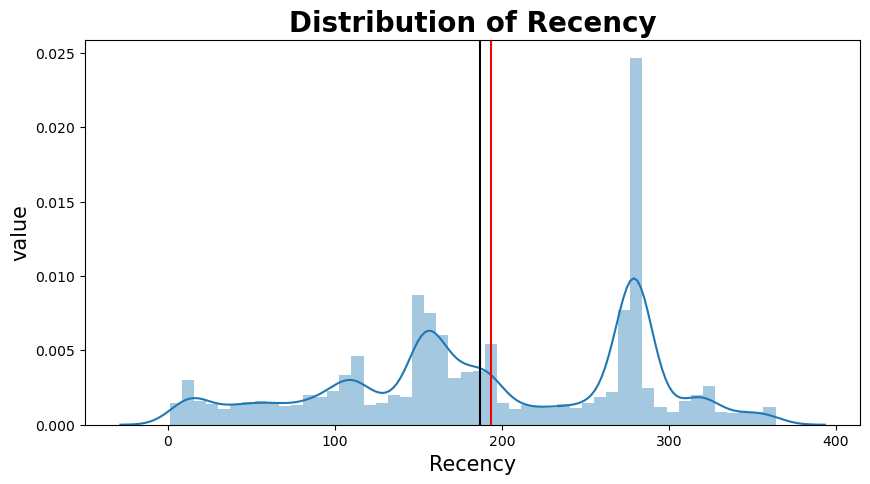

Mean of recency:  193.3252050403796
Median of recency:  187.0
Skewness of recency:  -0.2657452199792525


In [19]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Recency)
plt.axvline(rfm.Recency.mean(), c = 'red')
plt.axvline(rfm.Recency.median(), c = 'black')
plt.title('Distribution of Recency',fontweight='bold',fontsize=20)
plt.xlabel('Recency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of recency: ', rfm.Recency.mean())
print('Median of recency: ', rfm.Recency.median())
print('Skewness of recency: ', rfm.Recency.skew())

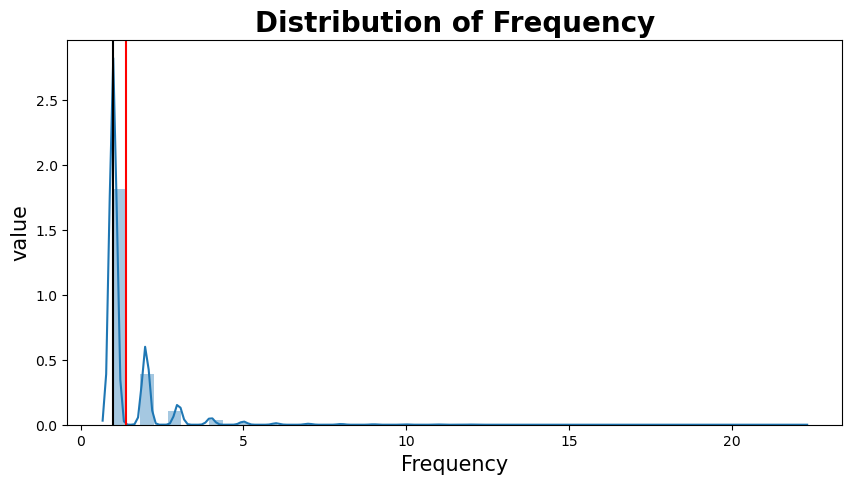

Mean of frequency:  1.3889796687930114
Median of frequency:  1.0
Skewness of frequency:  5.491042762036449


In [20]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontweight='bold',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of frequency: ', rfm.Frequency.mean())
print('Median of frequency: ', rfm.Frequency.median())
print('Skewness of frequency: ', rfm.Frequency.skew())

In [21]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

,Cust Id,Recency,Frequency,Monetary
3,20,1,1,28719.018
4,21,239,1,105.000
8,41,316,1,219.900
14,62,327,1,680.000
16,70,147,1,107.270


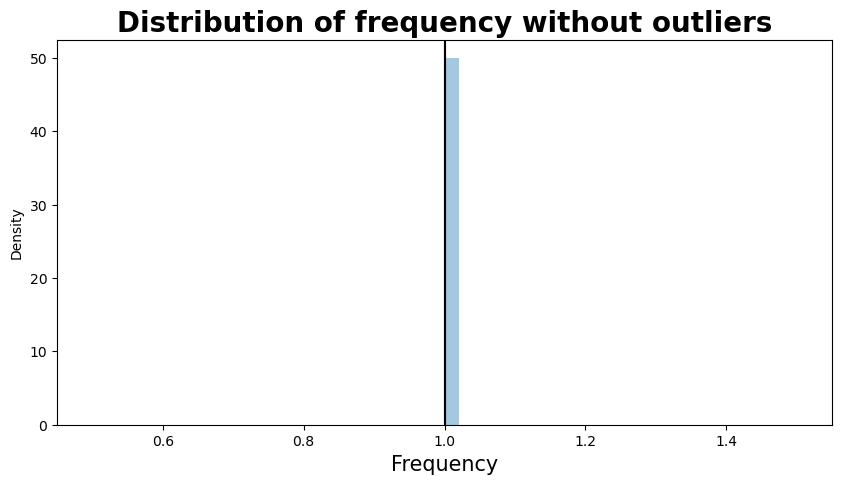

In [22]:
plt.figure(figsize=(10, 5))
sns.distplot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [23]:
frequencyDistribution.Frequency.describe()

count    48475.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequency, dtype: float64

##### Observations:

1. The frequency from RFM analysis without outliers has a standard deviation of 0, that is, all the values are only 1.
2. So the frequency will not help in our analysis and also to segment the customers.

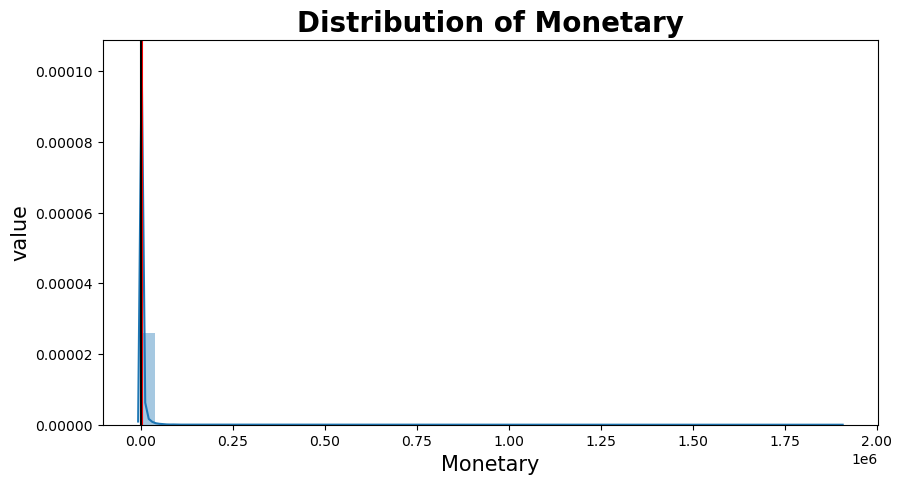

Mean of monetary:  3630.4094307108066
Median of monetary:  466.35
Skewness of monetary:  41.180678836488475


In [24]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribution of Monetary',fontweight='bold',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())

In [25]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()

,Cust Id,Recency,Frequency,Monetary
1,15,231,2,216.80
4,21,239,1,105.00
5,23,54,2,871.14
6,28,132,2,3971.30
8,41,316,1,219.90


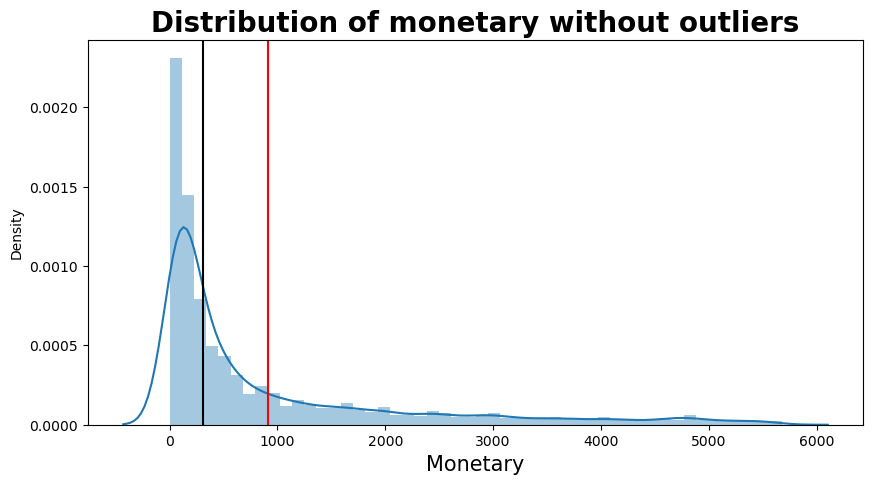

In [26]:
plt.figure(figsize=(10, 5))
sns.distplot(monetaryDistribution.Monetary)
plt.axvline(monetaryDistribution.Monetary.mean(), c = 'red')
plt.axvline(monetaryDistribution.Monetary.median(), c = 'black')
plt.xlabel('Monetary',color='black',fontsize=15)
plt.title('Distribution of monetary without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [27]:
monetaryDistribution.Monetary.describe()

count    55252.000000
mean       915.856993
std       1270.020479
min          0.000000
25%        107.977500
50%        309.600000
75%       1195.490000
max       5673.900000
Name: Monetary, dtype: float64

##### Observations:

1. The average monetary value after outlier treatement is 916 USD, while the median value is 310 USD.
2. The middle 50% of values of monetary lie between 108 and 1195.49 USD.

# Customer Segmentation

## Labels for Recency

In [28]:
ll_r = rfm.Recency.quantile(0.25)
mid_r = rfm.Recency.quantile(0.50)
ul_r = rfm.Recency.quantile(0.75)
print(ll_r, mid_r, ul_r)

134.0 187.0 277.0


In [29]:
def recency_label(recent):
    if recent <= ll_r:
        return 1
    elif (recent > ll_r) and (recent <= mid_r):
        return 2
    elif (recent > mid_r) and (recent <= ul_r):
        return 3
    elif recent > ul_r:
        return 4

In [30]:
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm.head()

,Cust Id,Recency,Frequency,Monetary,recency_label
0,4,1,3,27394.190,1
1,15,231,2,216.800,3
2,16,322,2,11868.899,4
3,20,1,1,28719.018,1
4,21,239,1,105.000,3


##### Recency label breakdown:
1. - These are the customers who whose visit date(s) are the most recent. (Recency value within the 25% quantile)
2. - These are the customers who whose visit date(s) are not very recent. (Recency value between 25% and 50% quantile)
3. - These are the customers who whose visit date(s) are somewhat recent. (Recency value between 50% and 75% quantile)
4. - These are the customers who whose visit date(s) are the oldest. (Recency value more than 75% quantile)

## Labels for Monetary

In [31]:
ll_m = rfm.Monetary.quantile(0.25)
mid_m = rfm.Monetary.quantile(0.50)
ul_m = rfm.Monetary.quantile(0.75)
print(ll_m, mid_m, ul_m)

127.3 466.35 2346.075


In [32]:
def monetary_label(money):
    if money <= ll_m:
        return 4
    elif (money > ll_m) and (money <= mid_m):
        return 3
    elif (money > mid_m) and (money <= ul_m):
        return 2
    elif money > ul_m:
        return 1

In [33]:
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm.head()

,Cust Id,Recency,Frequency,Monetary,recency_label,monetary_label
0,4,1,3,27394.190,1,1
1,15,231,2,216.800,3,3
2,16,322,2,11868.899,4,1
3,20,1,1,28719.018,1,1
4,21,239,1,105.000,3,4


##### Monetary label breakdown:
1. - These are the customers who spend large amount. (Monetary value within the 25% quantile)
2. - These are the customers who spend good amount. (Monetary value between 25% and 50% quantile)
3. - These are the customers who spend moderately. (Monetary value between 50% and 75% quantile)
4. - These are the customers who spend the least. (Monetary value more than 75% quantile)

## Labels for Frequency

In [34]:
rfm.Frequency.value_counts()

1     48475
2     10440
3      2777
4       930
5       423
6       198
7       128
8        91
9        52
10       39
11       32
12       23
13       10
14        7
15        6
16        6
20        3
17        3
22        1
19        1
18        1
Name: Frequency, dtype: int64

In [35]:
def frequency_label(frequent):
    if frequent == 1:
        return 4
    elif frequent == 2:
        return 3
    elif frequent == 3:
        return 2
    elif frequent > 3:
        return 1

In [36]:
rfm['frequency_label'] = rfm.Frequency.apply(frequency_label)
rfm.head()

,Cust Id,Recency,Frequency,Monetary,recency_label,monetary_label,frequency_label
0,4,1,3,27394.190,1,1,2
1,15,231,2,216.800,3,3,3
2,16,322,2,11868.899,4,1,3
3,20,1,1,28719.018,1,1,4
4,21,239,1,105.000,3,4,4


##### Frequency label breakdown:
1. - These are the most frequent customers. (Frequency > 3)
2. - These are the frequent frequent customers. (Frequency = 3)
3. - These are the somewhat frequent customers. (Frequency = 2)
4. - These are the least frequent customers. (Frequency = 1)

In [37]:
rfm['Rank'] = list(zip(rfm.recency_label, rfm.monetary_label, rfm.frequency_label))
rfm.head()

,Cust Id,Recency,Frequency,Monetary,recency_label,monetary_label,frequency_label,Rank
0,4,1,3,27394.190,1,1,2,"(1, 1, 2)"
1,15,231,2,216.800,3,3,3,"(3, 3, 3)"
2,16,322,2,11868.899,4,1,3,"(4, 1, 3)"
3,20,1,1,28719.018,1,1,4,"(1, 1, 4)"
4,21,239,1,105.000,3,4,4,"(3, 4, 4)"


In [38]:
rfm.recency_label.value_counts()

2    16071
1    16015
3    15876
4    15684
Name: recency_label, dtype: int64

In [39]:
rfm.frequency_label.value_counts()

4    48475
3    10440
2     2777
1     1954
Name: frequency_label, dtype: int64

In [40]:
rfm.monetary_label.value_counts()

4    15913
1    15912
2    15911
3    15910
Name: monetary_label, dtype: int64

##### Observation:

1. Since most of the frequency class is 4, we will use only recency and monetary for customer segmentation.

In [41]:
rfm['rank_rm'] = list(zip(rfm.recency_label, rfm.monetary_label))
rfm.head()

,Cust Id,Recency,Frequency,Monetary,recency_label,monetary_label,frequency_label,Rank,rank_rm
0,4,1,3,27394.190,1,1,2,"(1, 1, 2)","(1, 1)"
1,15,231,2,216.800,3,3,3,"(3, 3, 3)","(3, 3)"
2,16,322,2,11868.899,4,1,3,"(4, 1, 3)","(4, 1)"
3,20,1,1,28719.018,1,1,4,"(1, 1, 4)","(1, 1)"
4,21,239,1,105.000,3,4,4,"(3, 4, 4)","(3, 4)"


In [42]:
rfm.rank_rm.value_counts()

(1, 1)    5150
(2, 2)    4894
(4, 4)    4793
(3, 3)    4234
(4, 3)    4202
(2, 3)    4159
(1, 4)    4110
(2, 1)    4080
(3, 4)    4072
(3, 2)    3833
(4, 2)    3744
(3, 1)    3737
(1, 2)    3440
(1, 3)    3315
(4, 1)    2945
(2, 4)    2938
Name: rank_rm, dtype: int64

## Meaning of ranks:
    The most important and least important customers (Recency Rank, Monetary Rank):
    Comparing Recency and Monetary - Recency rank is of higher importance than Monetary rank

#### Top Spenders:

- (1, 1)
- Definition: Very recent customers who have spent a significant amount of money.

#### Active Shoppers:

- (3, 2)
- (2, 2)
- Definition: Customers who are recent and have actively spent money.

#### Steady Buyers:

- (2, 4)
- (4, 2)
- Definition: Customers who may not be very recent but consistently spend money.
#### Recent Buyers:

- (3, 1)
- (2, 1)
- Definition: Customers who are recent and have made purchases.
#### Regular Shoppers:

- (2, 3)
- (4, 3)
- Definition: Customers who are not very recent but frequently make purchases.

#### New Buyers:

- (1, 2)
- Definition: Very recent customers who have made a purchase.
#### Occasional Shoppers:

- (1, 3)
- Definition: Very recent customers who make occasional purchases.
#### At-Risk Customers:

- (1, 4)
- (4, 1)
- (4, 4)
- Definition: Customers who are not very recent and spend a negligible amount.

#### Frequent Shoppers:

- (3, 1)
- (3, 2)
- (2, 4)
- Definition: Customers who are recent and frequently make purchases.
#### Potential Supporters:

- (2, 2)
- (2, 3)
- Definition: Customers who are recent and have the potential to become regular supporters.
#### Casual Buyers:

- (1, 2)
- Definition: Very recent customers who make purchases casually.
#### Value Shoppers:

- (4, 3)
- Definition: Customers who are not very recent but contribute a decent value through purchases.